In [1]:
#import dependencies
import gmaps
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
#ImportCSV

cities_df = pd.read_csv('norm2019.csv')
cities_df.head(10)


,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity,Latitude,Longitude
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,61.9241,25.74820
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,56.2639,9.50179
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,60.4720,8.46895
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,64.9631,-19.02100
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,52.1326,5.29127
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,46.8182,8.22751
6,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.373,0.267,60.1282,18.64350
7,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330,-40.9010,174.88600
8,Canada,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285,56.1304,-106.35000
9,Austria,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244,47.5162,14.55010


In [3]:
#cities_df.tail(10)
cities_df.iloc[145:156,0:11]

,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity,Latitude,Longitude
145,Zimbabwe,146,3.663,0.366,1.114,0.433,0.361,0.089,0.151,-19.01500,29.1549
146,Haiti,147,3.597,0.323,0.688,0.449,0.026,0.110,0.419,18.97120,-72.2850
147,Botswana,148,3.488,1.041,1.145,0.538,0.455,0.100,0.025,-22.32800,24.6849
148,Syria,149,3.462,0.619,0.378,0.440,0.013,0.141,0.331,34.80210,38.9968
149,Malawi,150,3.410,0.191,0.560,0.495,0.443,0.089,0.218,-13.25400,34.3015
150,Yemen,151,3.380,0.287,1.163,0.463,0.143,0.077,0.108,15.55270,48.5164
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,-1.94030,29.8739
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,-6.36900,34.8888
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,33.93910,67.7100
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,6.61111,20.9394


In [43]:
# Store latitude and longitude in locations
locations = cities_df[["Latitude", "Longitude"]]

#store markers
top_ten_df=locations.head(10)
bottom_ten_df=locations.tail(10)
#merging top and bottom ten
#top_ten1 = top_ten_df[["Latitude", "Longitude"]]
#top_ten1 = top_ten1.set_index("Latitude")
#bottom_ten1 = bottom_ten_df[["Latitude", "Longitude"]]
#bottom_ten1 = bottom_ten1.set_index("Latitude")
# merge
#top_bottom = top_ten1.merge(bottom_ten1, on="Latitude")

# Store Happiness Score and convert to float
rating = cities_df["Happiness Score"].astype(float)



In [49]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=9,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig



Figure(layout=FigureLayout(height='420px'))

In [11]:
fig = gmaps.figure(map_type="SATELLITE")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=3)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
usa_coordinants=(37.0902,-95.713)
gmaps.figure(center=usa_coordinants , zoom_level=5)

Figure(layout=FigureLayout(height='420px'))

The r-squared is: 0.3964175492210543


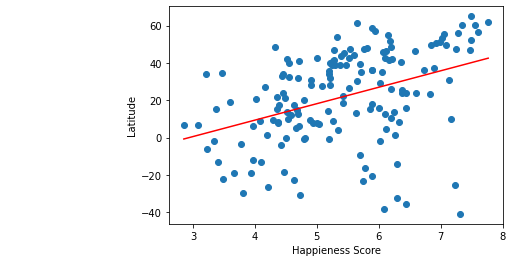

In [8]:
x_values = cities_df['Happiness Score']
y_values = cities_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Happieness Score')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue}")
plt.show()

In [9]:

# from Cynthia

happy2015_df.boxplot(“Happiness Score”, by=“Region”, figsize=(25, 10))
group1 = happy2015_df[happy2015_df[“Region”] == “Western Europe”][“Happiness Score”]
group2 = happy2015_df[happy2015_df[“Region”] == “Eastern Asia”][“Happiness Score”]
group3 = happy2015_df[happy2015_df[“Region”] == “Southern Asia”][“Happiness Score”]
group4 = happy2015_df[happy2015_df[“Region”] == “Latin America and Caribbean”][“Happiness Score”]
group5 = happy2015_df[happy2015_df[“Region”] == “North America”][“Happiness Score”]
group6 = happy2015_df[happy2015_df[“Region”] == “Australia and New Zealand”][“Happiness Score”]
group7 = happy2015_df[happy2015_df[“Region”] == “Middle East and Northern Africa”][“Happiness Score”]
group8 = happy2015_df[happy2015_df[“Region”] == “Southeastern Asia”][“Happiness Score”]
group9 = happy2015_df[happy2015_df[“Region”] == “Central and Eastern Europe”][“Happiness Score”]
group10 = happy2015_df[happy2015_df[“Region”] == “Sub-Saharan Africa”][“Happiness Score”]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

SyntaxError: invalid character in identifier (<ipython-input-9-4a2391412795>, line 3)

In [24]:
#coordinates=bottom_ten_df

# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#from Cynthia
happy2015_df.boxplot(“Trust (Government Corruption)“, by=“Region”, figsize=(25, 10))
group1 = happy2015_df[happy2015_df[“Region”] == “Western Europe”][“Trust (Government Corruption)“]
group2 = happy2015_df[happy2015_df[“Region”] == “Eastern Asia”][“Trust (Government Corruption)“]
group3 = happy2015_df[happy2015_df[“Region”] == “Southern Asia”][“Trust (Government Corruption)“]
group4 = happy2015_df[happy2015_df[“Region”] == “Latin America and Caribbean”][“Trust (Government Corruption)“]
group5 = happy2015_df[happy2015_df[“Region”] == “North America”][“Trust (Government Corruption)“]
group6 = happy2015_df[happy2015_df[“Region”] == “Australia and New Zealand”][“Trust (Government Corruption)“]
group7 = happy2015_df[happy2015_df[“Region”] == “Middle East and Northern Africa”][“Trust (Government Corruption)“]
group8 = happy2015_df[happy2015_df[“Region”] == “Southeastern Asia”][“Trust (Government Corruption)“]
group9 = happy2015_df[happy2015_df[“Region”] == “Central and Eastern Europe”][“Trust (Government Corruption)“]
group10 = happy2015_df[happy2015_df[“Region”] == “Sub-Saharan Africa”][“Trust (Government Corruption)“]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)